In [9]:
# Name : Dimpal Lad
# CWID : 20023001
# Assignment No : 09
# Assignment Name : HW09_Cluster_9.1

In [10]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [11]:
# Load the dataset
data = pd.read_csv("C:/Users/dimpa/OneDrive - stevens.edu/CS-513/HW07_SVM/wisc_bc_ContinuousVar.csv")

# Remove rows with missing values
data.dropna(inplace=True)

# Extract features (excluding the diagnosis column)
features = data.drop(columns=['diagnosis'])

In [12]:
# Perform hierarchical clustering
linkage_matrix = linkage(features, method='single')

In [13]:
# Specify the number of clusters you want
num_clusters = 2

# Assign data points to clusters using fcluster
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Add the cluster labels to the original dataframe
data['cluster'] = clusters

In [14]:
# Tabulate the clustered rows against the diagnosis column
clustered_data = data[['diagnosis', 'cluster']].groupby(['diagnosis', 'cluster']).size().unstack(fill_value=0)

# Print the tabulated results
print(clustered_data)

cluster    1    2
diagnosis        
B          6  351
M          5  207


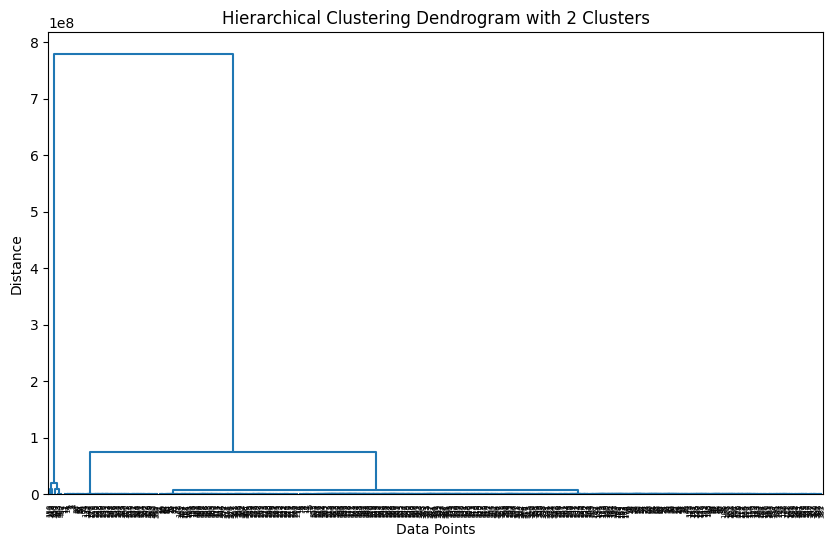

In [15]:
# Plot the dendrogram with color-coded clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=num_clusters)
plt.title('Hierarchical Clustering Dendrogram with {} Clusters'.format(num_clusters))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()